# Entrenando modelos de Machine Learning


Importamos las librerías necesarias

In [1]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Hay que preparar el target

### Los valores de mercado los dividiremos en rangos, estableciendo 4 rangos:
0. De 0 al Primer cuartil (C1)
1. De C1 a C2
2. De C2 a C3
3. De C3 a C4

In [2]:
df = pd.read_csv('/Users/alexcar934/Desktop/Proyecto Machine Learning/src/data/processed/Datos.csv')
df['Valor de Mercado'].describe()

count    2.012000e+03
mean     1.189624e+07
std      1.815462e+07
min      5.000000e+04
25%      1.750000e+06
50%      5.000000e+06
75%      1.500000e+07
max      2.000000e+08
Name: Valor de Mercado, dtype: float64

Teniendo los cuartiles, cambiamos los valores por los nuevos

In [3]:
values = []
for i in df['Valor de Mercado']:
    if i < 1750000:
        values.append(0)
    elif i >= 1750000 and i < 5000000:
        values.append(1)
    elif i >= 5000000 and i < 15000000:
        values.append(2)
    elif i >= 15000000:
        values.append(3)


In [4]:
df['Valor de Mercado'] = values

Para la visualización en árboles, creamos una lista para conocer que significa cada valor del target

In [5]:
target_names = ['0 - 1.750.000', '1.750.000 - 5.000.000', '5.000.000 - 15.000.000', '+15.000.000']

Ahora quitamos la columna con los nombres de cada jugador, pues no será necesaria para la elaboración de nuestros modelos

In [6]:
df = df.iloc[:,1:]

Dividimos entre los datos y el target

In [7]:
X = df.drop(['Nombre del jugador','Valor de Mercado'], axis=1)
y = df['Valor de Mercado']

Creamos un heatmap para ver la correlación que tienen las variables

<AxesSubplot: >

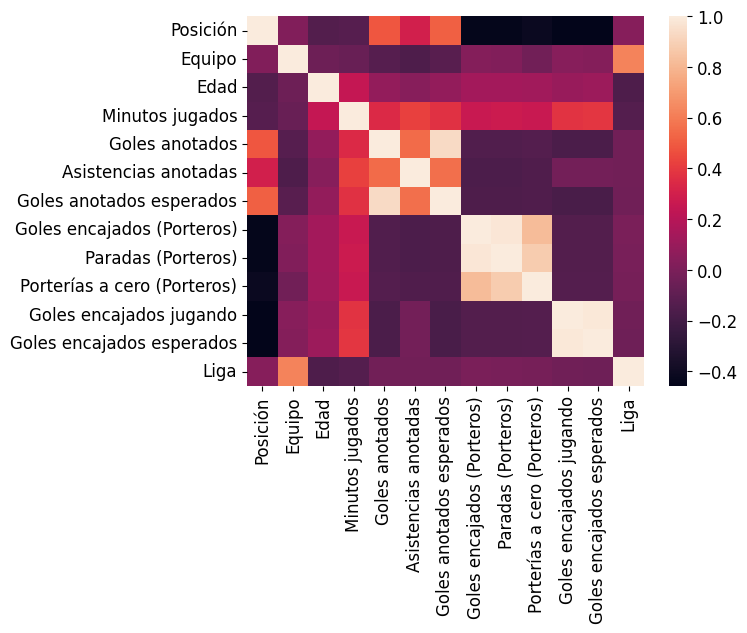

In [8]:
sns.heatmap(X.corr())

# Modelos de Machine Learning

### Vamos a probar con los siguientes modelos

1. Árbol Clasificador
2. Regresión Logística
3. Random Forest
4. Grid Search CV --> Random Forest vs Regresión Logística
5. Grid Search CV --> SVC
6. KNN
7. XG Boost Clasificador
8. Gradient Boosting Clasificador

# 1. Árbol clasificador

Probamos a realizar un árbol clasificador, cambiando parámetros

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
tree_clf = DecisionTreeClassifier(max_depth= 7,random_state=42, max_features = 9)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=9, random_state=42)

Realizamos la predicción de test y miramos scores.

In [10]:
pred = tree_clf.predict(X_test)
print('Accuracy en train:',tree_clf.score(X_train, y_train))
print('Accuracy en test:',tree_clf.score(X_test, y_test))

Accuracy en train: 0.7371037911746426
Accuracy en test: 0.6203473945409429


In [53]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 9,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Realizamos la matrix de confusión para ver entre que valores tiene mayor duda

In [11]:
confusion_matrix(y_test, pred)

array([[69, 14,  5,  1],
       [16, 32, 25,  2],
       [11, 23, 77, 23],
       [ 1,  3, 29, 72]])

# 2. Regresión Logística

In [12]:
log_reg = LogisticRegression(penalty = 'l2',C=0.0001)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.5359801488833746


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
log_reg.score(X_train, y_train)

0.5786202610316967

# 3. Random Forest

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

rnd_clf = RandomForestClassifier(n_estimators = 80, random_state = 42, max_depth=11, max_features = 12)

In [15]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features=12, n_estimators=80,
                       random_state=42)

In [16]:
y_pred_test = rnd_clf.predict(X_test)
y_pred_train = rnd_clf.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9757613424487259
0.6625310173697271


In [17]:
rnd_clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=11, max_features=12, n_estimators=80,
                       random_state=42)>

In [18]:
confusion_matrix(y_train, y_pred_train)

array([[388,  12,   1,   0],
       [  2, 379,   5,   0],
       [  2,  12, 379,   0],
       [  0,   0,   5, 424]])

In [19]:
confusion_matrix(y_test, y_pred_test)

array([[70, 17,  1,  1],
       [12, 45, 17,  1],
       [ 4, 35, 69, 26],
       [ 1,  3, 18, 83]])

# 4. Grid Search CV --> Random Forest vs Logistic Regression

Queremos saber si la Regresión Logística mejoraría el resultado de un Random Forest

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
pipe = Pipeline(steps=[("classifier", RandomForestClassifier())])

logistic_params = {
    'classifier': [LogisticRegression()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.arange(10, 100, 10)
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [75,80,82,96,120],
    'classifier__max_features': [7,9,10],
    'classifier__max_depth': [7,9]
} #Esta es la combinación que mayor score nos da

search_space = [random_forest_params, logistic_params]

grid = GridSearchCV(pipe,
                   search_space,
                   cv = 20,
                   n_jobs=-1)

grid.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(max_depth=9,
                                                                max_features=9,
                                                                n_estimators=82)],
                          'classifier__max_depth': [7, 9],
                          'classifier__max_features': [7, 9, 10],
                          'classifier__n_estimators': [75, 80, 82, 96, 120]},
                         {'classifier': [LogisticRegression()],
                          'classifier__C': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                          'classifier__penalty': ['l1', 'l2']}])

Miramos los mejores estimadores, parámetros y el score obtenido

In [21]:
print("Best estimator:", grid.best_estimator_)
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=9, max_features=9,
                                        n_estimators=82))])
Best params: {'classifier': RandomForestClassifier(max_depth=9, max_features=9, n_estimators=82), 'classifier__max_depth': 9, 'classifier__max_features': 9, 'classifier__n_estimators': 82}
Best score: 0.6941666666666667


##### Vemos la puntuación de X_test y X_train

Después hacemos la matriz de confusión para ver los errores

In [22]:
best_estimator = grid.best_estimator_
pred_train = grid.predict(X_train)
pred_test = grid.predict(X_test)
print('Accuracy en train:',best_estimator.score(X_train, y_train))
print('Accuracy en test:',best_estimator.score(X_test, y_test))

Accuracy en train: 0.9185829707893102
Accuracy en test: 0.6377171215880894


### Vemos la matriz de confusión 
Su función para este proyecto es verificar cuantos errores relevantes existen:
* Valores de 0 que se predigan como 2 o 3
* valores de 1 que se predigan como 3

In [23]:
print('Matriz de coonfusión en train: \n',confusion_matrix(y_train, pred_train))
print('Matriz de confusión en test: \n',confusion_matrix(y_test, pred_test))

Matriz de coonfusión en train: 
 [[379  19   3   0]
 [  9 344  33   0]
 [  5  21 363   4]
 [  0   6  31 392]]
Matriz de confusión en test: 
 [[68 19  2  0]
 [12 40 22  1]
 [ 3 35 72 24]
 [ 1  2 25 77]]


# 5. Grid Search CV --> SVC

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
svc = svm.SVC()

parameters = {
    'kernel': ['rbf'],
    'C': [250,400,500,550,750],
    'gamma': ['scale'],
    'coef0': [-1000,-100,-1,10,100]
}

grid = GridSearchCV(estimator = svc,
                   param_grid = parameters,
                    n_jobs = -1,
                    scoring = 'accuracy',
                    cv = 20 #20 validaciones cruzadas por cada combinación de hiperparámetros
                    )

#Entrenamos el modelo

grid.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [250, 400, 500, 550, 750],
                         'coef0': [-1000, -100, -1, 10, 100],
                         'gamma': ['scale'], 'kernel': ['rbf']},
             scoring='accuracy')

In [25]:
print("Best estimator:", grid.best_estimator_)
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best estimator: SVC(C=750, coef0=-1000)
Best params: {'C': 750, 'coef0': -1000, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.6544444444444445


In [26]:
best_estimator = grid.best_estimator_
print('Accuracy en train:',best_estimator.score(X_train, y_train))
print('Accuracy en test:',best_estimator.score(X_test, y_test))


Accuracy en train: 0.6774394033561218
Accuracy en test: 0.6104218362282878


In [27]:
pred_train = grid.predict(X_train)
pred_test = grid.predict(X_test)

print('Matriz de confusión en train: \n',confusion_matrix(y_train, pred_train))
print('Matriz de confusión en test: \n', confusion_matrix(y_test, pred_test))

Matriz de confusión en train: 
 [[317  78   5   1]
 [ 83 207  81  15]
 [ 22  87 211  73]
 [  0  11  63 355]]
Matriz de confusión en test: 
 [[68 20  1  0]
 [18 37 17  3]
 [ 6 34 61 33]
 [ 1  4 20 80]]


# 6. KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors = 3, p= 2,leaf_size = 5, n_jobs = -1)
#p=1 indica que queremos el valor otorgado por la distancia de manhattan
knn.fit(X,y)

KNeighborsClassifier(leaf_size=5, n_jobs=-1, n_neighbors=3)

In [29]:
pred = knn.predict(X)
knn.score(X,y)

0.7326043737574552

In [49]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 5,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

Vemos la matriz de confusión

In [30]:
confusion_matrix(y,pred)

array([[435,  38,  15,   2],
       [ 86, 310,  57,   8],
       [ 60,  97, 320,  50],
       [ 14,  57,  54, 409]])

Se determina que no es un buen modelo por la alta dispersión de la matriz de confusión.

# 7. XG Boost Clasificador

In [31]:
import xgboost
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
xgb = xgboost.XGBClassifier(n_estimators = 80,max_depth = 4, n_jobs = -1, early_stopping_rounds = 58)
xgb.fit(X_train,y_train, eval_set = [(X_val, y_val)])

[0]	validation_0-mlogloss:1.22082
[1]	validation_0-mlogloss:1.11758
[2]	validation_0-mlogloss:1.04528
[3]	validation_0-mlogloss:0.99437
[4]	validation_0-mlogloss:0.95378
[5]	validation_0-mlogloss:0.91999
[6]	validation_0-mlogloss:0.89017
[7]	validation_0-mlogloss:0.87040
[8]	validation_0-mlogloss:0.85131
[9]	validation_0-mlogloss:0.84127
[10]	validation_0-mlogloss:0.83198
[11]	validation_0-mlogloss:0.82101
[12]	validation_0-mlogloss:0.81721
[13]	validation_0-mlogloss:0.81028
[14]	validation_0-mlogloss:0.80325
[15]	validation_0-mlogloss:0.79851
[16]	validation_0-mlogloss:0.79491
[17]	validation_0-mlogloss:0.79271
[18]	validation_0-mlogloss:0.78777
[19]	validation_0-mlogloss:0.78428
[20]	validation_0-mlogloss:0.78529
[21]	validation_0-mlogloss:0.78214
[22]	validation_0-mlogloss:0.78031
[23]	validation_0-mlogloss:0.78100
[24]	validation_0-mlogloss:0.77935
[25]	validation_0-mlogloss:0.77905
[26]	validation_0-mlogloss:0.77918
[27]	validation_0-mlogloss:0.78085
[28]	validation_0-mlogloss:0.7

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=58, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=80,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [33]:
pred = xgb.predict(X_val)
pred_train = xgb.predict(X_train)
xgb.score(X_train, y_train)

0.8837787445618397

In [34]:
accuracy_score(y_val, pred)

0.6625310173697271

In [35]:
confusion_matrix(y_train, pred_train)

array([[374,  25,   2,   0],
       [ 25, 321,  39,   1],
       [  8,  32, 331,  22],
       [  0,   4,  29, 396]])

In [48]:
xgb.get_xgb_params()

{'objective': 'multi:softprob',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 4,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [36]:
confusion_matrix(y_val, pred)

array([[71, 14,  4,  0],
       [14, 41, 20,  0],
       [ 5, 30, 71, 28],
       [ 1,  2, 18, 84]])

In [37]:
from sklearn.metrics import mean_squared_error
val_error = mean_squared_error(y_val, pred)
print("Validation MSE:", val_error)

Validation MSE: 0.4392059553349876


In [38]:
pd.DataFrame(xgb.feature_names_in_,xgb.feature_importances_)

,0
0.048943,Posición
0.209672,Equipo
0.107141,Edad
0.107743,Minutos jugados
0.082834,Goles anotados
0.052885,Asistencias anotadas
0.077164,Goles anotados esperados
0.038066,Goles encajados (Porteros)
0.052124,Paradas (Porteros)
0.026010,Porterías a cero (Porteros)


# Gradient Booosting Clasificador

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth = 5, n_estimators = 6, learning_rate = 0.95, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.95, max_depth=5, n_estimators=6,
                           random_state=42)

In [40]:
pred_train = gbrt.predict(X_train)
pred_test= gbrt.predict(X_val)
gbrt.score(X_train, y_train)

0.9751491053677932

In [41]:
accuracy_score(y_val, pred)

ValueError: Found input variables with inconsistent numbers of samples: [1006, 403]

In [ ]:
confusion_matrix(y_train, pred_train)

array([[254,   4,   1,   0],
       [  1, 230,   4,   0],
       [  0,   7, 234,   3],
       [  0,   0,   5, 263]])

In [ ]:
confusion_matrix(y_val, pred_test)

array([[179,  41,  11,   0],
       [ 43, 117,  59,   7],
       [  9,  65, 145,  64],
       [  1,  10,  57, 198]])